In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as cnst


plt.rcParams['text.usetex'] = True
plt.style.use(['science','notebook','grid'])
#constants

hbar = cnst.hbar
h=cnst.h
qe = cnst.e
me = cnst.m_e
ub = (qe*hbar)/(2*me)
u0 = cnst.mu_0
pi = np.pi



Bo = 17.99 #Gs


# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

In [66]:
# kb = cnst.k
# T = 300 #K
# c = cnst.c

# l= 0.01

# f = c/(l*np.sqrt(2))

# a = np.exp((h*f)/(kb*T))

# n = 1/(a-1);

# n

# TCNQ Data

## 49 Mhz

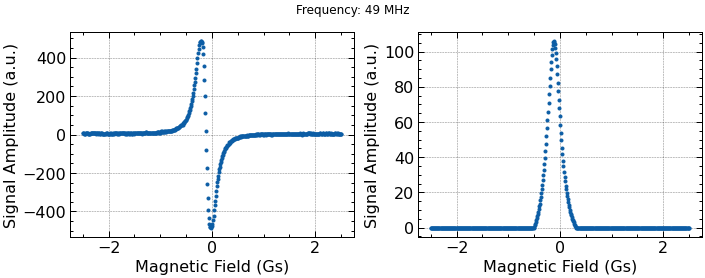

In [67]:
#import and store txt file for 49Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_49k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i] )/2)) + A[i-1]

#A = A-(4.5*B0)+11 #straighten curve for display (without this part, I believe modulation causes [try commenting out this portion to see what it does] 
                                    #the curve to display tilted or maybe the integration approximation I used is terrible)
                                            # In my defense, the plots seem consistent; also, I think all that matters is that
                                                #linewidth and maximum is preserved.

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0

            
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.savefig('49tcnq', bbox_inches='tight')
plt.show()


In [50]:

# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

maxA = np.max(A)
index = np.where(A == maxA)

B1 = B0[index][0] 

Ba = (B1 + Bo) *(10**(-4)) #T

freq1 = 49000*(10**3) #Hz

g1 =(h*freq1)/(ub*Ba)

In [58]:
diff_min1 = 100
imin1 = 0


for i in range(n):
    diff = np.abs((maxA/2) - A[i])
    if diff < diff_min1:
        diff_min1 = diff
        imin1 = i    
        
        
diff_min2 = 100
imin2 = 0

for i in range(n):
    diff = np.abs((maxA/2) - A[i])
    if (diff < diff_min2) and (i != imin1):
        diff_min2 = diff
        imin2 = i  

HDB1 = np.abs(B0[imin1]-B0[imin2]) #Gs

HDB1T = HDB1*(10**(-4)) #T

g1

1.9591152869729416

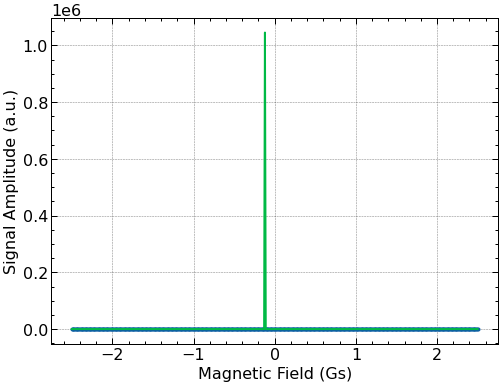

2.931605788944512e-07

In [60]:
gam1 = (g1*ub)/hbar
DB1 = HDB1T

T2 = (np.sqrt(2))/(gam1 * DB1)


def F(B):
    a = (gam1*T2)
    b = a/pi
    c = 1 + ((a**2)*((B - B1)**2))
    d = b/c
    return 65*d

xvalsb = B0
yvalsb = F(B0)

_ = plt.plot(B0, A, marker = '.', linestyle = 'none')
_ = plt.plot(xvalsb, yvalsb)

plt.xlabel("Magnetic Field (Gs)")
plt.ylabel("Signal Amplitude (a.u.)")
plt.savefig('deez graph', bbox_inches='tight')

plt.show()
T2

In [45]:
minF = np.min(F)
maxF = np.max(F)

F_max_index = np.where(F == maxF)
F_min_index = np.where(F == minF)

ind1 = F_min_index[0][0]
ind2 = F_max_index[0][0]

Bmin=B0[ind1]
Bmax=B0[ind2]

SDB1 = Bmin-Bmax

SDB1T = SDB1*(10**(-4))

SDB1

0.0

## 49.3 MHz

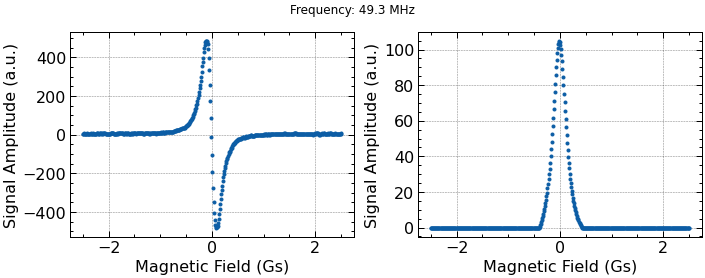

104.74

In [8]:
#import and store txt file for 49.3Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_49(3)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

#A = A+10 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.3 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

max(A)

In [9]:

# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B2 = B0[index][0] 

Ba = (B2 + Bo) *(10**(-4)) #T

freq2 = 49300*(10**3) #Hz

g2 =(h*freq2)/(ub*Ba)

## 49.6 MHz

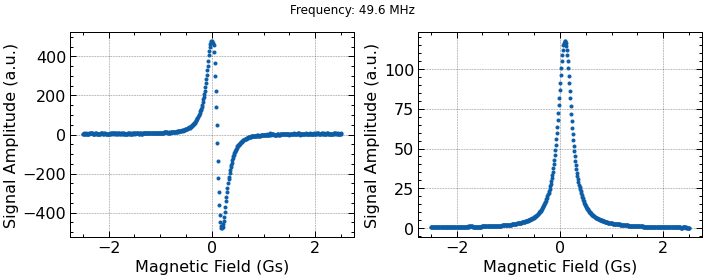

In [10]:
#import and store txt file for 49.6Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_49(6)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+16 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.6 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [11]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B3 = B0[index][0]

Ba = (B3 + Bo) *(10**(-4)) #T

freq3 = 49600*(10**3) #Hz

g3 =(h*freq3)/(ub*Ba)

## 49.9 MHz

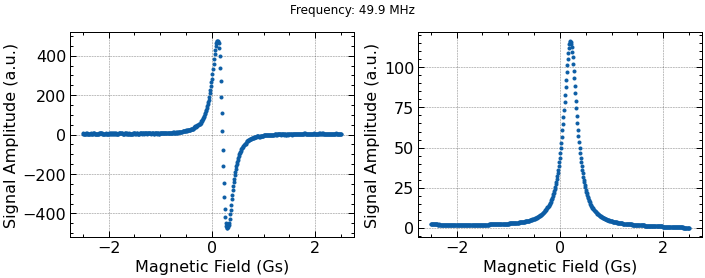

In [12]:
#import and store txt file for 49.9Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_49(9)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+12 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.9 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [13]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B4 = B0[index][0] 

Ba = (B4 + Bo) *(10**(-4)) #T

freq4 = 49900*(10**3) #Hz

g4 =(h*freq4)/(ub*Ba)

## 50 MHz

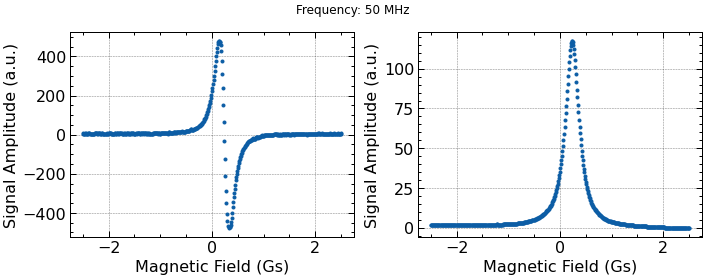

In [14]:
#import and store txt file for 50Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_50k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+19 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 50 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [15]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B5 = B0[index][0] 

Ba = (B5 + Bo) *(10**(-4)) #T

freq5 = 50000*(10**3) #Hz

g5 =(h*freq5)/(ub*Ba)

## 50.2 MHz

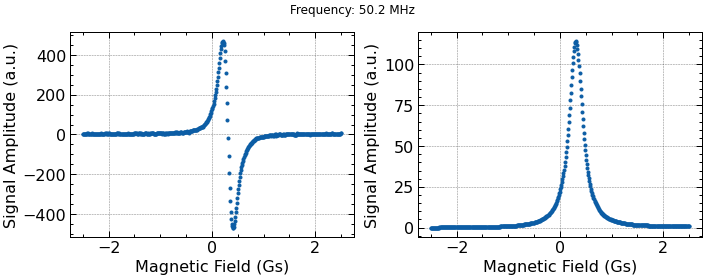

In [16]:
#import and store txt file for 50.2Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_50(2)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(3*B0)+5 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 50.2 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [17]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B6 = B0[index][0] 

Ba = (B6 + Bo) *(10**(-4)) #T

freq6 = 50200*(10**3) #Hz

g6 =(h*freq6)/(ub*Ba)

## 50.5 MHz

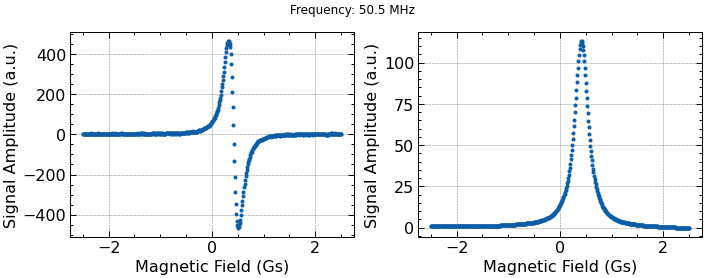

In [69]:
#import and store txt file for 50.5Mhz

data=pd.read_csv('tcnq/ESR_TCNQ_50(5)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(2.7*B0)+7 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 50.5 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.savefig('505tcnq', bbox_inches='tight')
plt.show()

In [19]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

B7 = B0[index][0] 

Ba = (B7 + Bo) *(10**(-4)) #T

freq7 = 50500*(10**3) #Hz

g7 =(h*freq7)/(ub*Ba)












# DPPH Data

## 49 MHz

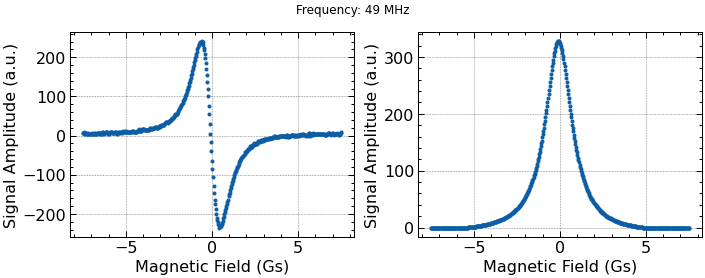

In [70]:
#import and store txt file for 49 Mhz

data=pd.read_csv('dpph/ESR_DPPH_49k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+65 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.savefig('49dpph', bbox_inches='tight')
plt.show()

In [21]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd1 = B0[index][0] 

Ba = (Bd1 + Bo) *(10**(-4)) #T

freqd1 = 49000*(10**3) #Hz

gd1 =(h*freqd1)/(ub*Ba)

## 49.3 MHz

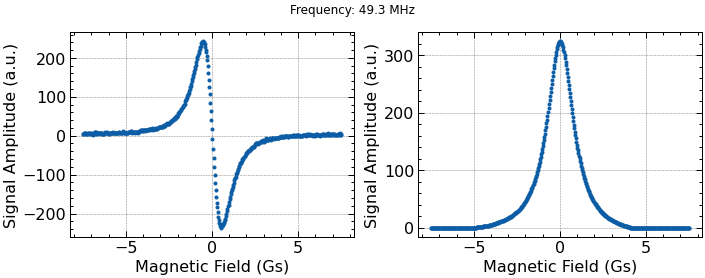

In [22]:
#import and store txt file for 49.3 Mhz

data=pd.read_csv('dpph/ESR_DPPH_49(3)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+3 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.3 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [23]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd2 = B0[index][1] 

Ba = (Bd2 + Bo) *(10**(-4)) #T

freqd2 = 49300*(10**3) #Hz

gd2 =(h*freqd2)/(ub*Ba)

## 49.6 MHz

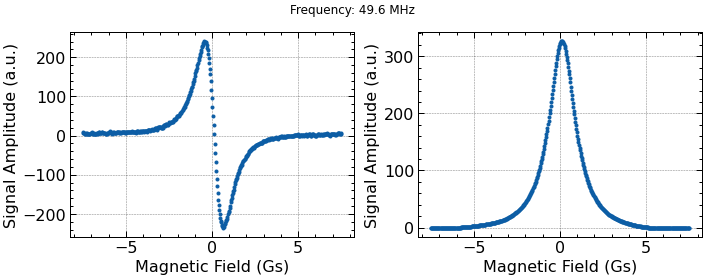

In [24]:
#import and store txt file for 49.6 Mhz

data=pd.read_csv('dpph/ESR_DPPH_49(6)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+51 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.6 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [25]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd3 = B0[index][0] 

Ba = (Bd3 + Bo) *(10**(-4)) #T

freqd3 = 49600*(10**3) #Hz

gd3 =(h*freqd3)/(ub*Ba)

## 49.9 MHz

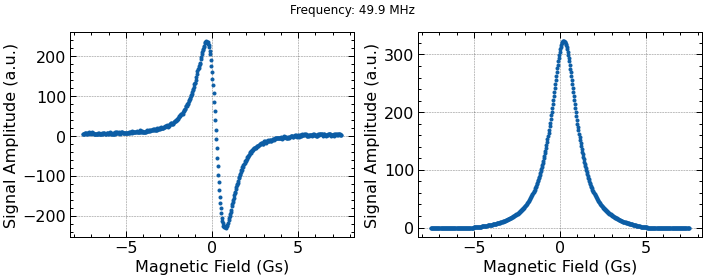

In [26]:
#import and store txt file for 49.9 Mhz

data=pd.read_csv('dpph/ESR_DPPH_49(9)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(5*B0)+3 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 49.9 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [27]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd4 = B0[index][0] 

Ba = (Bd4 + Bo) *(10**(-4)) #T

freqd4 = 49900*(10**3) #Hz

gd4 =(h*freqd4)/(ub*Ba)

## 50.2 MHz

(There wasn't a 50Hz file??)

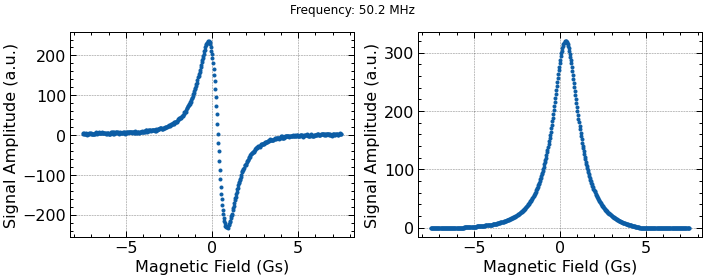

In [28]:
#import and store txt file for 50.2 Mhz

data=pd.read_csv('dpph/ESR_DPPH_50(2)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

A = A-(4*B0)+28 #straighten curve for display

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 50.2 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.show()

In [29]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd5 = B0[index][0] 

Ba = (Bd5 + Bo) *(10**(-4)) #T

freqd5 = 50200*(10**3) #Hz

gd5 =(h*freqd5)/(ub*Ba)

## 50.5 MHz

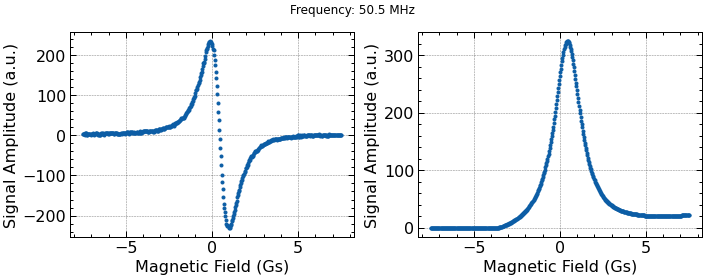

In [71]:
#import and store txt file for 50.5 Mhz

data=pd.read_csv('dpph/ESR_DPPH_50(5)k.csv')
B0=data['B0'].values
F=-data['F'].values


#integrate derivative curve
n = len(F)

A = np.zeros(n)

for i in range(0,n):
    A[i] = ((B0[i]-B0[i-1])*(( F[i-1] + F[i])/2)) + A[i-1]

#A = A-(3*B0) #straighten curve for display

#### DPPH 50.5 MHz is kind of a weird one.. if I modify it as usual, it changes the magnetic values; Also,
#### The right tail of the curve is elevated, but the curve is not tilted. I have no idea what happened here.
####  I'm going to leave this one alone. The max is just slightly different from the one in the program anyways..

for i in range(0,n): #filter out negative values; intensity curves are positive definite
    if A[i] < 0:
        A[i] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Frequency: 50.5 MHz')

ax1.plot(B0, F, '.')
ax1.set_ylabel('Signal Amplitude (a.u.)')
ax1.set_xlabel('Magnetic Field (Gs)')

ax2.plot(B0, A, '.')
ax2.set_ylabel('Signal Amplitude (a.u.)')
ax2.set_xlabel('Magnetic Field (Gs)')
fig.tight_layout()
plt.savefig('505dpph', bbox_inches='tight')
plt.show()

In [31]:
# H0=(17.99-0.12)*(10**(-4)) #T

# freq = 49000*(10**3) #Hz

# (h*freq)/(ub*H0)

max = np.max(A)
index = np.where(A == max)

Bd6 = B0[index][0] 

Ba = (Bd6 + Bo) *(10**(-4)) #T

freqd6 = 50500*(10**3) #Hz

gd6 =(h*freqd6)/(ub*Ba)

# Analysis

## g-factors

In [32]:
# TCNQ

G1 = np.array([g1,g2,g3,g4,g5,g6,g7])
freqT = np.array([freq1,freq2,freq3,freq4,freq5,freq6,freq7])
Bt = np.array([B1,B2,B3,B4,B5,B6,B7])

#DPPH 

G2 = np.array([gd1,gd2,gd3,gd4,gd5,gd6])
freqD = np.array([freqd1,freqd2,freqd3,freqd4,freqd5,freqd6])
Bd = np.array([Bd1,Bd2,Bd3,Bd4,Bd5,Bd6])

## g-factor analysis for TCNQ

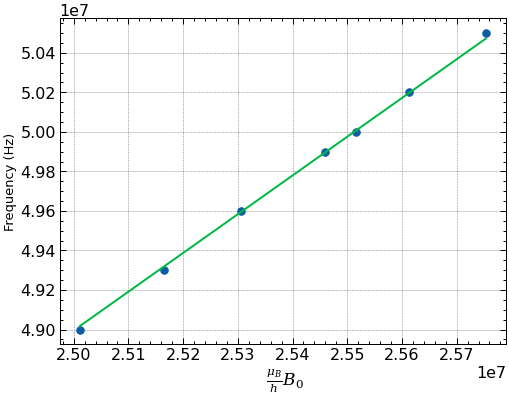

The mean g-factor for TCNQ from the software is:    g = 1.9598170848589695
The line fitted g-factor for TCNQ is:    g = 1.9598264647897465
The relaxation time is $\DeltaH$ = 2.6469538062504886e-07


In [63]:
#reverse the displacement of the Bt values and convert from Gauss to Teslas

BT = (Bo + Bt)*(10**(-4)) #T

xvals = BT*(ub/h)
yvals = freqT


#use least squares to fit data points and estimate the slope 
##I needed to do a linefit without a y-intercept but couldn't find a way to do it with numpy (it always outputs a y-intercept)
## so I did it manually

sum1 = 0
sum2 = 0

N=len(xvals)

for i in range(N):
    sum1 = sum1 + (xvals[i]*yvals[i])
    sum2 = sum2 + (xvals[i]*xvals[i])

m = (sum1)/(sum2)

ylinevals = m*xvals

_ = plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')

_ = plt.plot(xvals, ylinevals)

_ = plt.xlabel(r" $\frac{\mu _B}{h}B_0$ ", fontsize=17)

_ = plt.ylabel('Frequency (Hz)', fontsize=13)
plt.savefig('g1', bbox_inches='tight')
plt.show()


exper1_g = np.mean(G1)
fitted1_g = m
gamma1 = (exper1_g * ub)/hbar
DH1 = 0.31 * (10**(-4))
relaxation_time1 = np.sqrt(2)/(gamma1*DH1 )

print('The mean g-factor for TCNQ from the software is:    g = ' + str(exper1_g)) 
print('The line fitted g-factor for TCNQ is:    g = ' + str(fitted1_g))
print('The relaxation time is $\DeltaH$ = ' + str(relaxation_time1))

## g-factor analysis for DPPH

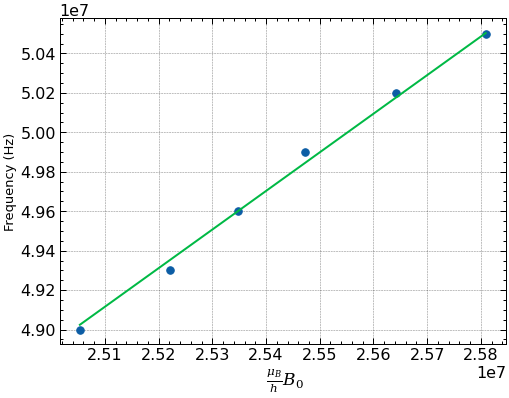

The mean g-factor for TCNQ from the software is:    g = 1.9567917751598296
The line fitted g-factor for TCNQ is:    g = 1.956805554936377
The relaxation time is $\DeltaH$ = 4.565690583246555e-08


In [64]:
#reverse the displacement of the Bt values and convert from Gauss to Teslas

BD = (Bo + Bd)*(10**(-4)) #T

xvals = BD*(ub/h)
yvals = freqD


#use least squares to fit data points and estimate the slope 
##I needed to do a linefit without a y-intercept but couldn't find a way to do it with numpy (it always outputs a y-intercept)
## so I did it manually

sum1 = 0
sum2 = 0

N=len(xvals)

for i in range(N):
    sum1 = sum1 + (xvals[i]*yvals[i])
    sum2 = sum2 + (xvals[i]*xvals[i])

m = (sum1)/(sum2)

ylinevals = m*xvals

_ = plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')

_ = plt.plot(xvals, ylinevals)

_ = plt.xlabel(r" $\frac{\mu _B}{h}B_0$ ", fontsize=17)

_ = plt.ylabel('Frequency (Hz)', fontsize=13)
plt.savefig('g2', bbox_inches='tight')
plt.show()


exper2_g = np.mean(G2)
fitted2_g = m
gamma2 = (exper2_g * ub)/hbar
DH2 = 1.80 * (10**(-4))
relaxation_time2 = np.sqrt(2)/(gamma2*DH2 )

print('The mean g-factor for TCNQ from the software is:    g = ' + str(exper2_g)) 
print('The line fitted g-factor for TCNQ is:    g = ' + str(fitted2_g))
print('The relaxation time is $\DeltaH$ = ' + str(relaxation_time2))